In [1]:
import pandas as pd

In [2]:
ling = pd.read_csv('ling.csv')
ling

,subject,body,label
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0
1,NaN,"lang classification grimes , joseph e . and ba...",0
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0
3,risk,a colleague and i are researching the differin...,0
4,request book information,earlier this morning i was on the phone with a...,0
...,...,...,...
2854,win $ 300usd and a cruise !,"raquel 's casino , inc . is awarding a cruise ...",1
2855,you have been asked to join kiddin,"the list owner of : "" kiddin "" has invited you...",1
2856,anglicization of composers ' names,"judging from the return post , i must have sou...",0
2857,"re : 6 . 797 , comparative method : n - ary co...",gotcha ! there are two separate fallacies in t...,0


In [3]:
ling["label"].value_counts()

0    2401
1     458
Name: label, dtype: int64

In [4]:
ling["subject"]

0                 job posting - apple-iss research center
1                                                     NaN
2       query : letter frequencies for text identifica...
3                                                    risk
4                                request book information
                              ...                        
2854                          win $ 300usd and a cruise !
2855                   you have been asked to join kiddin
2856                   anglicization of composers ' names
2857    re : 6 . 797 , comparative method : n - ary co...
2858                 re : american - english in australia
Name: subject, Length: 2859, dtype: object

In [5]:
import sys

sys.path.append("../Handlers")

import preprocessing

[nltk_data] Downloading package punkt to E:/nltk...
[nltk_data]   Package punkt is already up-to-date!


In [6]:
subject = "subject"
body = "body"
ling_input = ling.apply(lambda x: f"{x[subject]} {x[body]}", axis=1)

In [7]:
from functools import partial

preprocession = partial(
    preprocessing.preprocess_text,
    remove_numbers=True,
)

preprocessed_data = ling_input.apply(preprocession)
preprocessed_data

0       [job, posting, appleiss, research, center, con...
1       [nan, lang, classification, grimes, joseph, e,...
2       [query, letter, frequencies, text, identificat...
3       [risk, colleague, researching, differing, degr...
4       [request, book, information, earlier, morning,...
                              ...                        
2854    [win, usd, cruise, raquel, casino, inc, awardi...
2855    [asked, join, kiddin, list, owner, kiddin, inv...
2856    [anglicization, composers, names, judging, ret...
2857    [comparative, method, n, ary, comparison, gotc...
2858    [american, english, australia, hello, working,...
Length: 2859, dtype: object

In [8]:
processed_frame = pd.DataFrame(
    {
        "preprocessed_data": preprocessed_data,
        "label": ling["label"]
    }
)
processed_frame.to_csv("./ling_preprocessed.csv")

In [9]:
import itertools

combined = list(itertools.chain.from_iterable(preprocessed_data))
len(combined)

778913

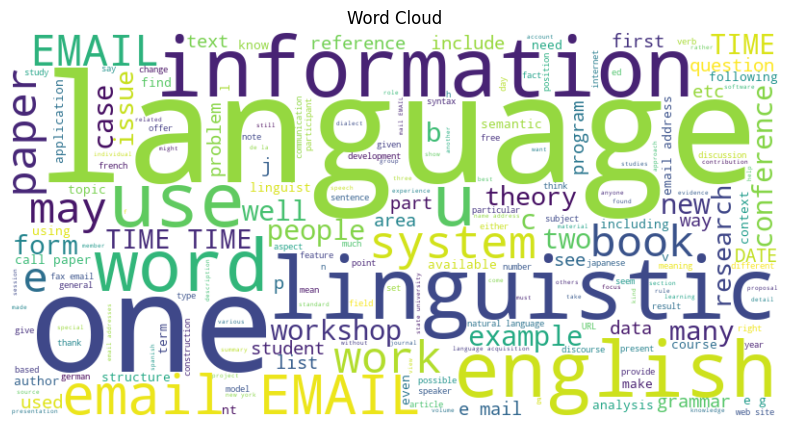

In [10]:
preprocessing.visualize_wordcloud(combined)

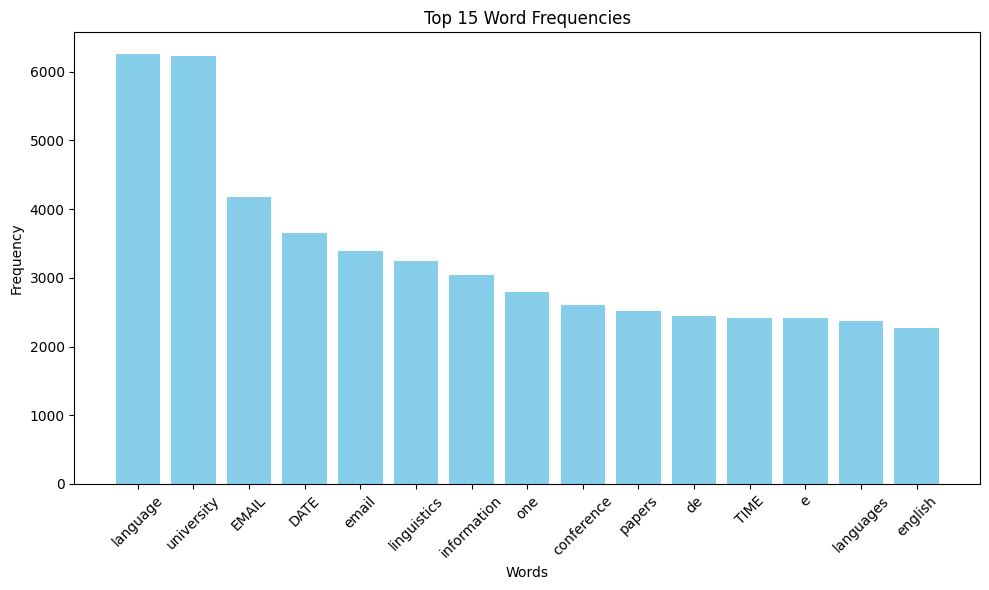

In [11]:
from collections import Counter
import matplotlib.pyplot as plt

counter = Counter(combined)
most_common = counter.most_common(15)

words, counts = zip(*most_common)

plt.figure(figsize=(10, 6))
plt.bar(words, counts, color='skyblue')
plt.title("Top 15 Word Frequencies")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

del combined